In [11]:
import pandas as pd
import matplotlib.pyplot as plt


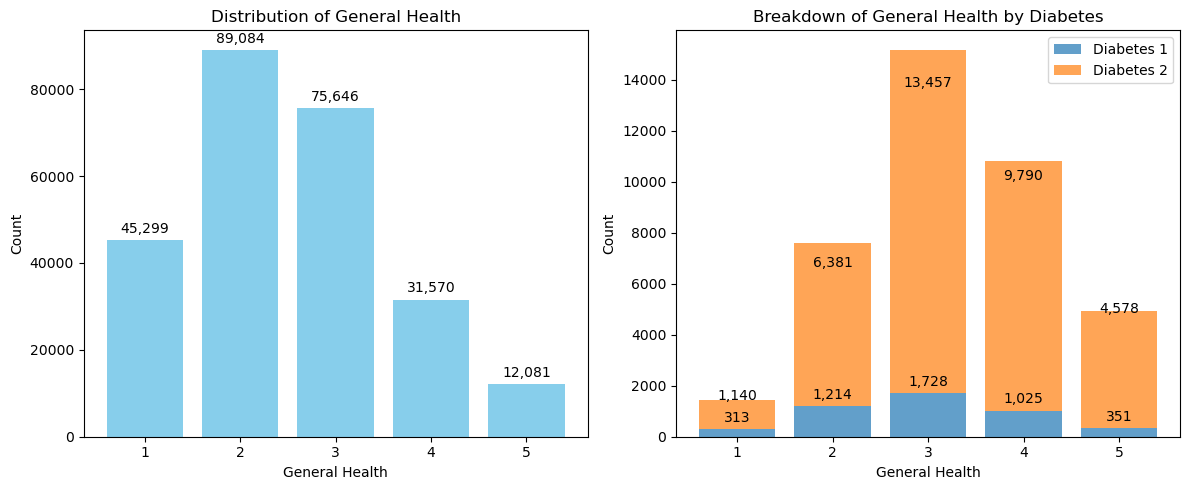

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('Resources/diabetes_012_health_indicators_BRFSS2015.csv') 

# Calculate the counts for each unique value in the "GenHlth" column
genhealth_counts = data['GenHlth'].value_counts().sort_index()

# Create an empty DataFrame to store the breakdown of "General Health" values for each "Diabetes" value
breakdown_df = pd.DataFrame(index=genhealth_counts.index)

# Iterate through each unique value in the "Diabetes" column and calculate the breakdown
for diabetes_value in range(1, 6):
    breakdown_counts = data[data['Diabetes_012'] == diabetes_value]['GenHlth'].value_counts().sort_index()
    breakdown_df[f'Diabetes {diabetes_value}'] = breakdown_counts

# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 5))  

# Plot the first bar chart for "General Health"
plt.subplot(1, 2, 1)
bars = plt.bar(genhealth_counts.index, genhealth_counts.values, color='skyblue', label='General Health')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Distribution of General Health')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

# Plot the second bar chart for "Diabetes" with the breakdown of "General Health" values
plt.subplot(1, 2, 2)
bottom = [0] * len(breakdown_df.index)
legend_labels = []
for diabetes_value in range(1, 6):
    counts = breakdown_df[f'Diabetes {diabetes_value}']
    if counts.sum() >= 300:
        bars = plt.bar(breakdown_df.index, counts, bottom=bottom, alpha=0.7, label=f'Diabetes {diabetes_value}')
        legend_labels.append(f'Diabetes {diabetes_value}')
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                         textcoords="offset points", ha='center', va='bottom')
        bottom = [b + v for b, v in zip(bottom, counts)]

plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Breakdown of General Health by Diabetes')
plt.legend(labels=legend_labels)

plt.tight_layout() 
plt.show()


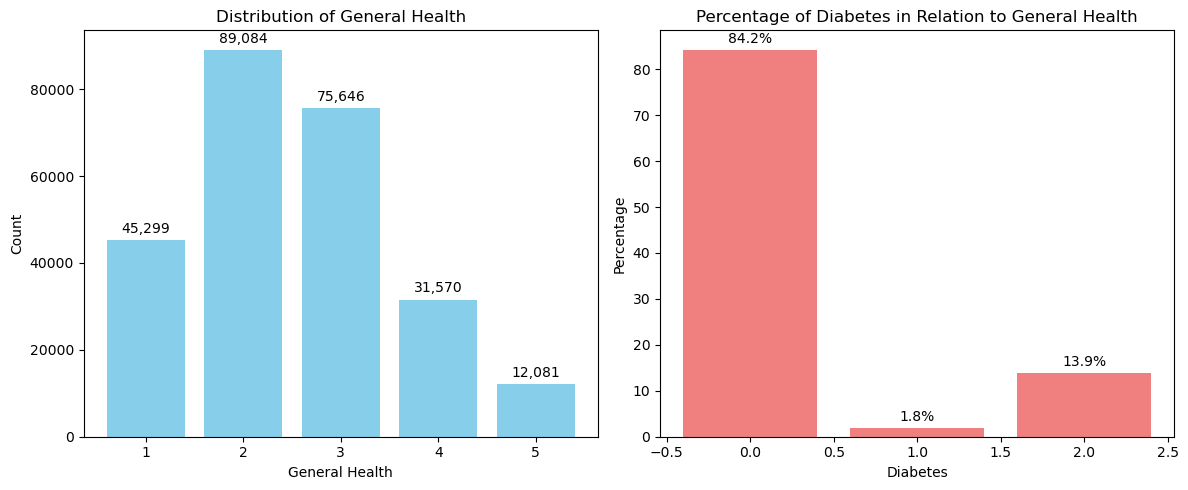

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('Resources/diabetes_012_health_indicators_BRFSS2015.csv') 

# Calculate the counts for "General Health"
genhealth_counts = data['GenHlth'].value_counts().sort_index()

# Calculate the counts for "Diabetes" and calculate the percentage of each category in relation to "General Health"
diabetes_counts = data['Diabetes_012'].value_counts().sort_index()
percentage_diabetes = (diabetes_counts / genhealth_counts.sum()) * 100

# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 5))  

# Plot the first bar chart for "General Health"
plt.subplot(1, 2, 1)
bars = plt.bar(genhealth_counts.index, genhealth_counts.values, color='skyblue', label='General Health')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Distribution of General Health')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

# Plot the second bar chart for "Diabetes" as a percentage of "General Health"
plt.subplot(1, 2, 2)
bars = plt.bar(percentage_diabetes.index, percentage_diabetes.values, color='lightcoral', label='Diabetes as % of General Health')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetes in Relation to General Health')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

plt.tight_layout() 
plt.show()


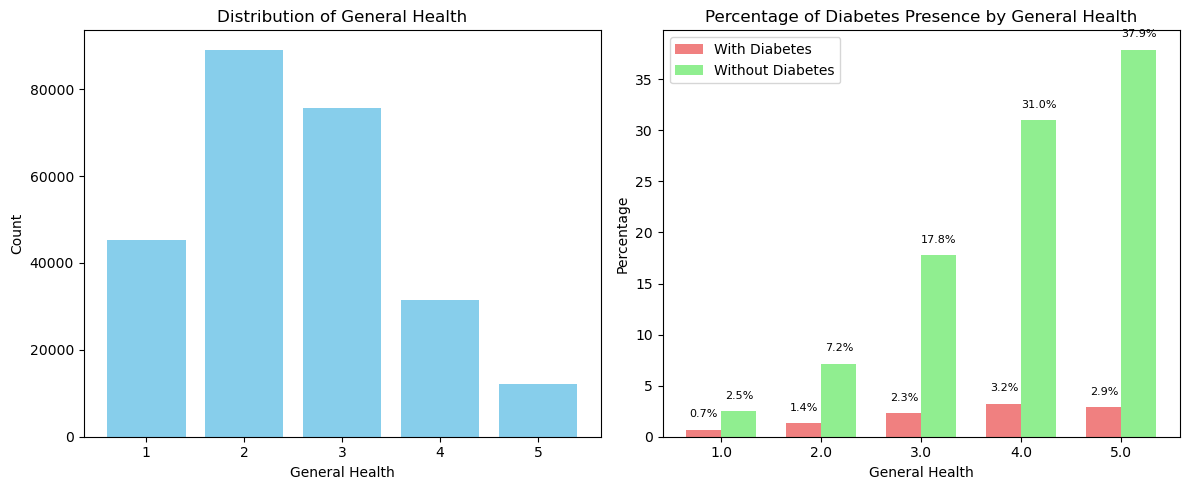

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('Resources/diabetes_012_health_indicators_BRFSS2015.csv') 

# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 5))  

# Plot the first bar chart for "General Health"
plt.subplot(1, 2, 1)
genhealth_counts = data['GenHlth'].value_counts().sort_index()
bars = plt.bar(genhealth_counts.index, genhealth_counts.values, color='skyblue', label='General Health')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Distribution of General Health')

# Plot the second bar chart to break down "General Health" by diabetes presence
plt.subplot(1, 2, 2)
# Group data by "General Health" and "Diabetes_012", and calculate the percentages
grouped = data.groupby(['GenHlth', 'Diabetes_012']).size().unstack(fill_value=0)
total_counts = genhealth_counts.values  # Total counts of each "General Health" category
percentage_diabetes = (grouped[1] / total_counts) * 100
percentage_no_diabetes = (grouped[2] / total_counts) * 100

# Plot the percentages
bar_width = 0.35
x = range(len(genhealth_counts))
plt.bar(x, percentage_diabetes, width=bar_width, color='lightcoral', label='With Diabetes')
plt.bar([i + bar_width for i in x], percentage_no_diabetes, width=bar_width, color='lightgreen', label='Without Diabetes')
plt.xlabel('General Health')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetes Presence by General Health')
plt.xticks([i + bar_width / 2 for i in x], genhealth_counts.index)
plt.legend()

# Annotate the bars with percentages
for i, (p1, p2) in enumerate(zip(percentage_diabetes, percentage_no_diabetes)):
    plt.annotate(f'{p1:.1f}%', (i, p1 + 1), ha='center', va='bottom', fontsize=8)
    plt.annotate(f'{p2:.1f}%', (i + bar_width, p2 + 1), ha='center', va='bottom', fontsize=8)

plt.tight_layout() 
plt.show()


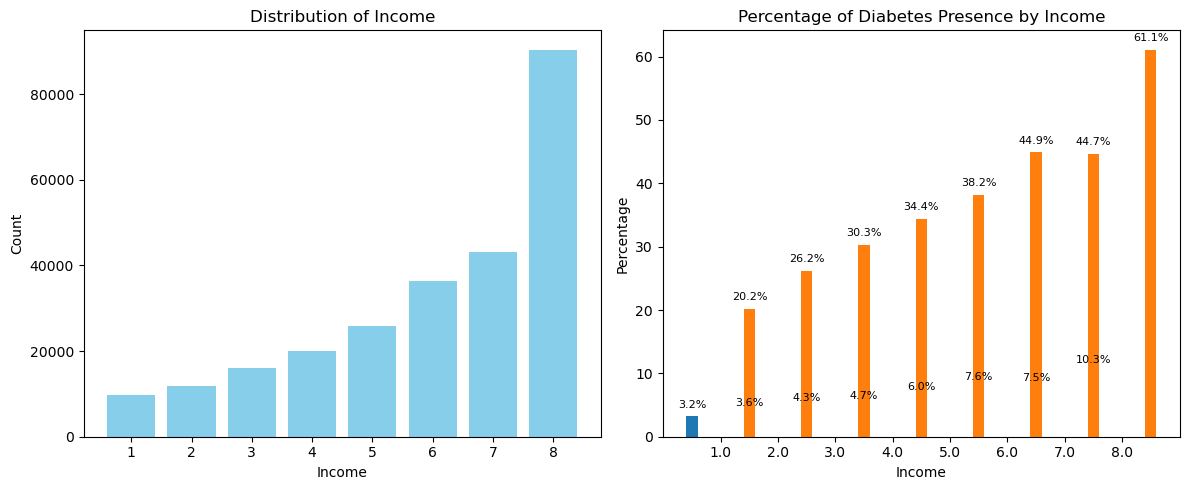

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('Resources/diabetes_012_health_indicators_BRFSS2015.csv') 

# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 5))  

# Plot the first bar chart for "Income" distribution
plt.subplot(1, 2, 1)
income_counts = data['Income'].value_counts().sort_index()
bars = plt.bar(income_counts.index, income_counts.values, color='skyblue', label='Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Plot the second bar chart to break down "Income" by diabetes presence
plt.subplot(1, 2, 2)

# Group data by "Income" and "Diabetes_012" and calculate the percentages
grouped = data.groupby(['Income', 'Diabetes_012']).size().unstack(fill_value=0)
income_categories = data['Income'].unique()
income_labels = [f'Income {category}' for category in income_categories]
percentage_by_income = (grouped / grouped.sum(axis=1) * 100).round(1)  # Multiply by 100 and round to 1 decimal place

# Plot the percentages for values above or equal to 2%
bar_width = 0.2
x = range(len(income_counts))
for i, income_category in enumerate(income_categories):
    percentages = percentage_by_income[income_category]
    if any(percentages >= 2):
        plt.bar(
            [pos + i * bar_width for pos in x],
            percentages,
            width=bar_width,
            label=income_labels[i]
        )

plt.xlabel('Income')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetes Presence by Income')
plt.xticks([pos + (len(income_categories) - 1) * bar_width / 2 for pos in x], income_counts.index)

# Annotate the bars with percentages
for i, income_category in enumerate(income_categories):
    percentages = percentage_by_income[income_category]
    for j, p in enumerate(percentages):
        if p >= 2:
            plt.annotate(f'{p:.1f}%', (x[j] + i * bar_width, p + 1), ha='center', va='bottom', fontsize=8)

plt.tight_layout() 
plt.show()


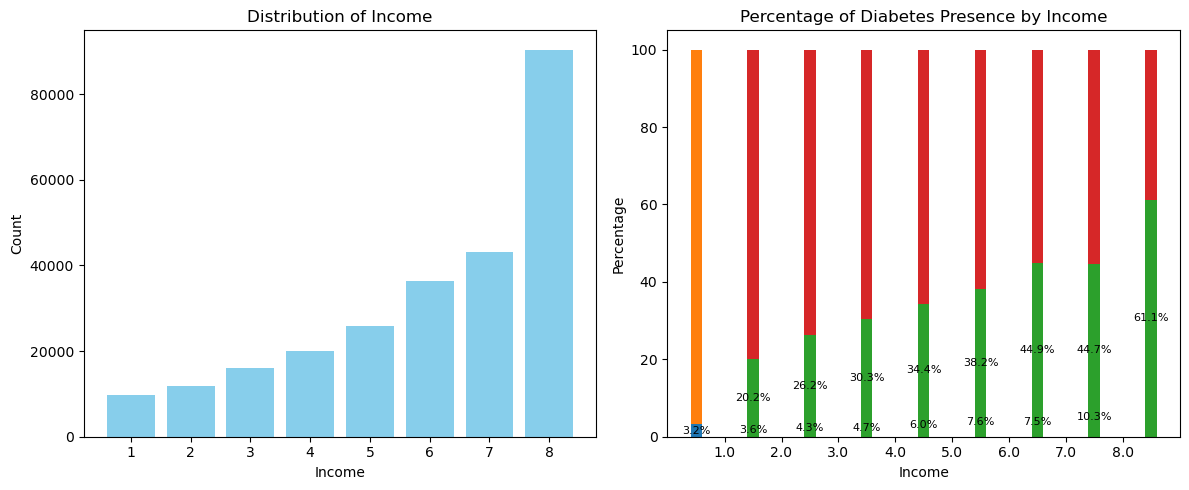

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('Resources/diabetes_012_health_indicators_BRFSS2015.csv') 

# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 5))  

# Plot the first bar chart for "Income" distribution
plt.subplot(1, 2, 1)
income_counts = data['Income'].value_counts().sort_index()
bars = plt.bar(income_counts.index, income_counts.values, color='skyblue', label='Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Plot the second bar chart to break down "Income" by diabetes presence
plt.subplot(1, 2, 2)

# Group data by "Income" and "Diabetes_012" and calculate the percentages
grouped = data.groupby(['Income', 'Diabetes_012']).size().unstack(fill_value=0)
income_categories = data['Income'].unique()
income_labels = [f'Income {category}' for category in income_categories]
percentage_by_income = (grouped / grouped.sum(axis=1) * 100).round(1)  # Calculate percentages and round to 1 decimal place

# Calculate complementary percentages (percentage of no diabetes)
percentage_no_diabetes = 100 - percentage_by_income

# Plot the percentages for values above or equal to 2%
bar_width = 0.2
x = range(len(income_counts))
for i, income_category in enumerate(income_categories):
    percentages_with_diabetes = percentage_by_income[income_category]
    percentages_no_diabetes = percentage_no_diabetes[income_category]
    if any(percentages_with_diabetes >= 2):
        plt.bar(
            [pos + i * bar_width for pos in x],
            percentages_with_diabetes,
            width=bar_width,
            label=f'{income_labels[i]} (Diabetes)'
        )
        plt.bar(
            [pos + i * bar_width for pos in x],
            percentages_no_diabetes,
            width=bar_width,
            bottom=percentages_with_diabetes,
            label=f'{income_labels[i]} (No Diabetes)'
        )

plt.xlabel('Income')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetes Presence by Income')
plt.xticks([pos + (len(income_categories) - 1) * bar_width / 2 for pos in x], income_counts.index)

# Annotate the bars with percentages
for i, income_category in enumerate(income_categories):
    percentages = percentage_by_income[income_category]
    for j, p in enumerate(percentages):
        if p >= 2:
            plt.annotate(f'{p:.1f}%', (x[j] + i * bar_width, p / 2), ha='center', va='center', fontsize=8)

plt.tight_layout() 
plt.show()
